<a href="https://colab.research.google.com/github/9oelM/ml/blob/main/1Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing Adaline
Since the perceptron rule and the ADAptive LInear NEuron classifier (Adaline) are very similar, we will take the perceptron implementation that we defined earlier and change the `fit` method so that the weights are updated by minimizing the cost function via gradient descent.

We are using pandas again to load the same data as we did in the Perceptron implementation.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4]
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [ ]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        return X
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
ada = AdalineGD(n_iter=30, eta=0.0001).fit(X, y)
ada.cost_

[51.08122709777622,
 48.734405003475466,
 47.268121538341724,
 46.127493074312454,
 45.11577153141929,
 44.16300470536643,
 43.244135928281686,
 42.350009099392544,
 41.47710358023412,
 40.62389994660111,
 39.78959323729818,
 38.973637280057545,
 38.17558324301583,
 37.39502235241281,
 36.63156549055843,
 35.88483585304935,
 35.15446623192374,
 34.44009793908688,
 33.74138031294905,
 33.05797043399406,
 32.38953291671959,
 31.735739730967378,
 31.096270035958685,
 30.47081002107818,
 29.859052751247802,
 29.260698016078376,
 28.67545218246425,
 28.103028050456263,
 27.54314471230968,
 26.995527414626327]

Instead of updating the weights after evaluating each individual training sample, as in the perceptron, we calculate the gradient based on the whole training dataset via `self.eta * errors.sum()` for the bias unit (zero-weight) and via `self.eta * X.T.dot(errors)` for the weights `1` to `m` where `X.T.dot(errors)` is a matrix-vector multiplication between our feature matrix and the error vector.

Please note that the activation method has no effect in the code since it is simply an identity function. Here, we added the activation function (computed via the `activation` method) to illustrate how information flows through a single layer neural network: features from the input data, net input, activation, and output.

Similar to the previous perceptron implementation, we collect the cost values in a `self.cost_` list to check whether the algorithm converged after training.

In practice, it often requires some experimentation to find a good learning rate $\eta$ for optimal convergence. So, let's choose two different learning rates, $\eta=0.01$ and $\eta=0.0001$, to start with and plot the cost functions versus the number of epochs to see how well the Adaline implementation learns from the training data.

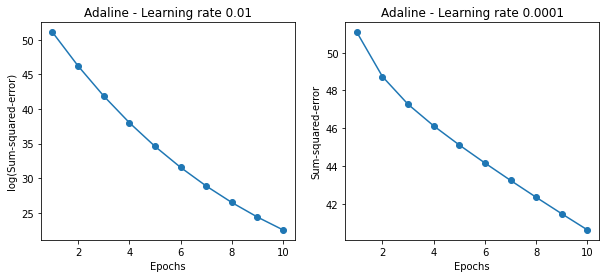

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

As we can see in the resulting cost-function plots, we encountered two different types of problem. The left chart shows what could happen if we choose a learning rate that is too large. Instead of minimizing the cost function, the error becomes larger in every epoch, because we overshoot the global minimum. On the other hand, we can see that the cost decreases on the right plot, but the chosen learning rate $\eta=0.0001$ is so small that the algorithm would require a very large number of epochs
to converge to the global cost minimum.

#Improving gradient descent through feature scaling

Many machine learning algorithms require feature scaling for optimal performance. Gradient descent is one of the many algorithms that benefit from feature scaling. One of the reasons why standardization helps with gradient descent learning is that the optimizer has to go through fewer steps to find a good or optimal solution.

Standardization can easily be achieved using the built-in NumPy methods `mean` and `std`.





In [ ]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

Let's use the same `plot_decision_regions` function as in the Perceptron example. 

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

After standardization, we will train Adaline again and see that it now converges after a small number of epochs using a learning rate $\eta=0.01$.

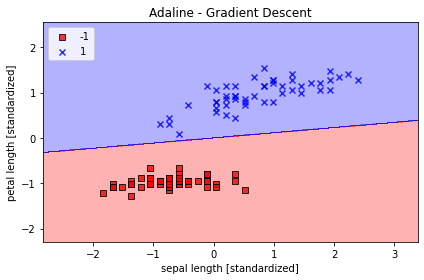

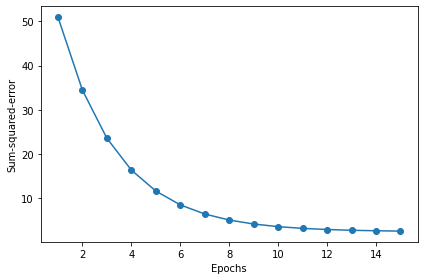

[50.97692262073463,
 34.462945201633055,
 23.572819267222187,
 16.385594939902248,
 11.642197678719509,
 8.511668206880145,
 6.445593148344737,
 5.082032707243371,
 4.182115219320861,
 3.5881910626368794,
 3.196215233044877,
 2.9375205002995766,
 2.7667881242247057,
 2.6541088132436417,
 2.579743145670434]

In [ ]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()
ada.cost_

As we can see in the plots, Adaline has now converged after training on the standardized features using a learning rate $\eta=0.01$. However, note that the SSE remains non-zero even though all samples were classified correctly.

#Large-scale machine learning and stochastic gradient descent

In the previous section, we learned how to minimize a cost function by taking a step in the opposite direction of a cost gradient that is calculated from the whole training set; this is why this approach is sometimes also referred to as batch gradient descent.
Now imagine we have a very large dataset with millions of data points, which is not uncommon in many machine learning applications. Running batch gradient descent can be computationally quite costly in such scenarios since we need to reevaluate the
whole training dataset each time we take one step towards the global minimum.

A popular alternative to the batch gradient descent algorithm is stochastic gradient descent, sometimes also called iterative or online gradient descent. Instead of updating the weights based on the sum of the accumulated errors over all samples we update the weights incrementally for each training sample.

Although stochastic gradient descent can be considered as an approximation of gradient descent, it typically reaches convergence much faster because of the more frequent weight updates. Since each gradient is calculated based on a single training
example, the error surface is noisier than in gradient descent, which can also have the advantage that stochastic gradient descent can escape shallow local minima more readily if we are working with nonlinear cost functions.

Another advantage of stochastic gradient descent is that we can use it for online learning. In online learning, our model is trained on the fly as new training data arrives. This is especially useful if we are accumulating large amounts of data, for
example, customer data in web applications. Using online learning, the system can immediately adapt to changes and the training data can be discarded after updating the model if storage space is an issue.

A compromise between batch gradient descent and stochastic gradient descent is so-called mini-batch learning. Mini-batch learning can be understood as applying batch gradient descent to smaller subsets of the training data, for example, 32 samples at a
time. The advantage over batch gradient descent is that convergence is reached faster via mini-batches because of the more frequent weight updates. Furthermore, mini-batch learning allows us to
replace the for loop over the training samples in stochastic gradient descent with vectorized operations, which can further improve the computational efficiency of our learning algorithm.

Since we already implemented the Adaline learning rule using gradient descent, we only need to make a few adjustments to modify the learning algorithm to update the weights via stochastic gradient descent. Inside the `fit` method, we will now update the weights after each training sample. Furthermore, we will implement an additional `partial_fit` method, which does not reinitialize the weights, for
online learning. In order to check whether our algorithm converged after training, we will calculate the cost as the average cost of the training samples in each epoch. Furthermore, we will add an option to shuffle the training data before each epoch to avoid repetitive cycles when we are optimizing the cost function; via the `random_state` parameter, we allow the specification of a random seed for reproducibility.

In [ ]:
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        return X
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

The `_shuffle` method that we are now using in the `AdalineSGD` classifier works as follows: via the permutation function in `np.random`, we generate a random sequence of unique numbers in the range 0 to 100. Those numbers can then be used as indices to shuffle our feature matrix and class label vector.
We can then use the fit method to train the `AdalineSGD` classifier and use our
`plot_decision_regions` to plot our training results.

In [ ]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

As we can see, the average cost goes down pretty quickly, and the final decision
boundary after 15 epochs looks similar to the batch gradient descent Adaline. If
we want to update our model, for example, in an online learning scenario with
streaming data, we could simply call the `partial_fit` method on individual samples—for instance `ada.partial_fit(X_std[0, :], y[0])` 

#Reference
Materials in this notebook are based on [Python Machine Learning](https://www.packtpub.com/data/python-machine-learning-third-edition).